# Melbourne Housing Market

Dataset referente ao mercado imobiliario de Melbourne.(preciso melhorar a descrição)


Dataset encontra-se disponivel no endereço: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [732]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [733]:
df = pd.read_csv(r"C:\Users\dougl\OneDrive\Área de Trabalho\Projetos GitHub\Melbourne_house\archive\Melbourne_housing_FULL.csv")

In [734]:
pd.set_option('display.max_columns',None)

In [735]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [736]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3103,Caulfield South,2/5 Moore St,3,h,NaN,SN,Gary,3/09/2016,9.3,3162.0,3.0,2.0,2.0,0.0,130.0,1993.0,Glen Eira City Council,-37.9018,145.0315,Southern Metropolitan,5051.0
15033,Hawthorn,202/7 Riversdale Rd,2,u,NaN,PI,Fletchers,3/06/2017,5.3,3122.0,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,11308.0
5155,Hampton East,1/23 Wickham Rd,3,h,926000.0,S,Buxton,18/06/2016,14.5,3188.0,2.0,2.0,2.0,393.0,140.0,1950.0,Bayside City Council,-37.9431,145.0267,Southern Metropolitan,2356.0
7421,Northcote,14 Northcote St,2,h,1050000.0,S,Barry,27/06/2016,5.5,3070.0,2.0,1.0,2.0,301.0,100.0,1925.0,Darebin City Council,-37.7740,145.0081,Northern Metropolitan,11364.0
26020,Hampton East,7/17 Keiller St,2,u,490000.0,S,Buxton,28/10/2017,13.8,3188.0,NaN,NaN,NaN,NaN,NaN,NaN,Bayside City Council,NaN,NaN,Southern Metropolitan,2356.0


In [737]:
df.tail(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,2.0,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [738]:
df.shape

(34857, 21)

In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [740]:
#Corrigindo o nome da coluna:
df.rename(columns={'Bedroom2': 'Bedroom'}, inplace = True)

***

Localizando e tratando as duplicidades:

In [741]:
df.duplicated().value_counts()

False    34856
True         1
dtype: int64

In [742]:
df = df.drop_duplicates()

In [743]:
df.duplicated().value_counts()

False    34856
dtype: int64

***

Visualização e tratamento de Outliers

In [744]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34856.000000,2.724700e+04,34855.000000,34855.000000,26639.000000,26630.000000,26128.000000,23046.000000,13741.000000,15550.000000,26880.000000,26880.000000,34853.000000
mean,3.031013,1.050173e+06,11.184808,3116.062430,3.084650,1.624747,1.728835,593.607177,160.251616,1965.287653,-37.810634,145.001845,7572.962901
std,0.969947,6.414671e+05,6.788952,109.025437,0.980708,0.724177,1.010789,3398.915462,401.281270,37.328340,0.090281,0.120167,4428.131940
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754092,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


In [745]:
df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

Rooms                 3.0000
Price            870000.0000
Distance             10.3000
Postcode           3103.0000
Bedroom               3.0000
Bathroom              2.0000
Car                   2.0000
Landsize            521.0000
BuildingArea        136.0000
YearBuilt          1970.0000
Lattitude           -37.8076
Longtitude          145.0078
Propertycount      6763.0000
Name: 0.5, dtype: float64

<AxesSubplot: >

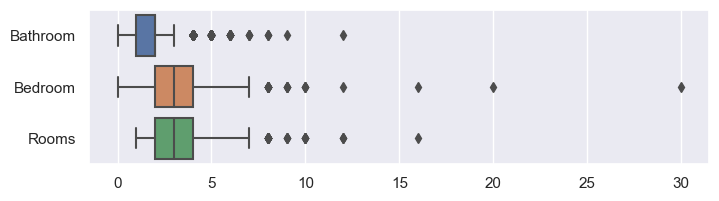

In [746]:
sns.set(rc={"figure.figsize":(8, 2)})
sns.boxplot(data=df[["Bathroom", "Bedroom","Rooms"]], orient="h")

melhorar a descricao


Conforme visualizado nos Boxplot acima, existe outliers para serem eleminados

In [747]:
df.drop(df.loc[df['Bathroom']>=4].index, inplace=True)
df.drop(df.loc[df['Bedroom']>=8].index, inplace=True)
df.drop(df.loc[df['Bedroom']<1].index, inplace=True)
df.drop(df.loc[df['Rooms']>=8].index, inplace=True)
df.drop(df.loc[df['Bathroom']<1].index, inplace=True)

<AxesSubplot: >

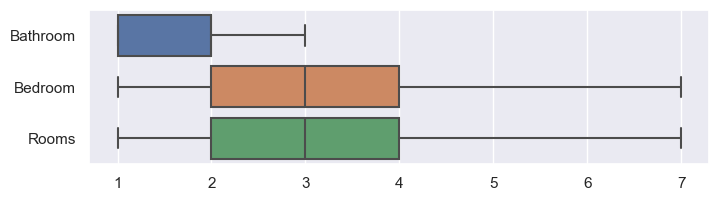

In [748]:
sns.set(rc={"figure.figsize":(8, 2)})
sns.boxplot(data=df[["Bathroom", "Bedroom","Rooms"]], orient="h")

<AxesSubplot: xlabel='Landsize'>

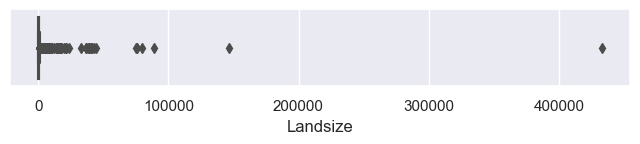

In [749]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['Landsize'])

In [750]:
df.drop(df.loc[df['Landsize']>=1300].index, inplace=True)

In [751]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['Landsize'])

<AxesSubplot: xlabel='BuildingArea'>

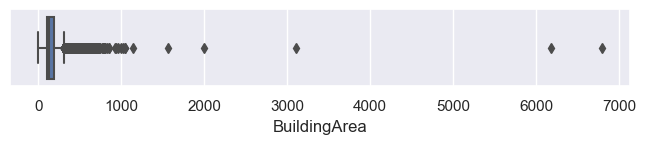

In [ ]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['BuildingArea'])

In [ ]:
df.drop(df.loc[df['BuildingArea']>=300].index, inplace=True)

<AxesSubplot: xlabel='BuildingArea'>

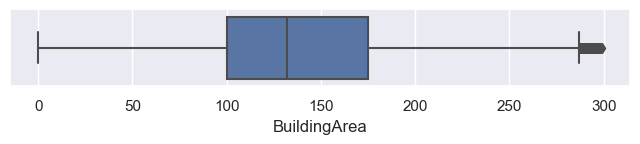

In [ ]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['BuildingArea'])

******************************

Verificando e tratando valores nulos:

In [ ]:
df.isnull().sum().sort_values(ascending=False)

BuildingArea     20590
YearBuilt        18811
Landsize         11674
Car               8696
Bathroom          8216
Bedroom           8207
Longtitude        7969
Lattitude         7969
Price             7118
Regionname           3
CouncilArea          3
Propertycount        3
Postcode             1
Distance             1
Address              0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Suburb               0
dtype: int64

É possivel visualizar acima, os dados que apresentão algum tipo de campo nulo. será iniciado o tratamento apartir destes dados.

Primeiro passo sera o preenchimento dos campos vazios referente ao tamanho da casa/área comstruida(BuildingArea), com base na mediana das casas com o mesmo numero de comodos(Rooms)até onde apresenta 7 comodos.
Para melhor obtebçao destes dados sera utilizado um dataset temporario onde sera deletados todos os campos com erro.

In [ ]:
df_limpo_temporario = df.dropna()
print(df_limpo_temporario.isnull().sum().sort_values())

Suburb           0
Longtitude       0
Lattitude        0
CouncilArea      0
YearBuilt        0
BuildingArea     0
Landsize         0
Car              0
Bathroom         0
Regionname       0
Bedroom          0
Distance         0
Date             0
SellerG          0
Method           0
Price            0
Type             0
Rooms            0
Address          0
Postcode         0
Propertycount    0
dtype: int64


In [ ]:
df_limpo_temporario.groupby("Rooms").agg({"BuildingArea":['min','mean', 'median','max']})

BuildingArea                           
               min        mean median     max
Rooms                                        
1              1.0   52.283619   49.0  207.00
2              0.0   88.334588   85.0  296.00
3              0.0  133.458584  129.0  292.00
4              0.0  186.265131  184.0  298.21
5              0.0  217.870987  223.5  297.00
6            113.0  227.833333  224.5  295.00
7            287.0  287.000000  287.0  287.00

In [ ]:
df.loc[df['Rooms'] == 1, 'BuildingArea'] = df.loc[df['Rooms'] == 1, 'BuildingArea'].fillna(50)
df.loc[df['Rooms'] == 2, 'BuildingArea'] = df.loc[df['Rooms'] == 2, 'BuildingArea'].fillna(85)
df.loc[df['Rooms'] == 3, 'BuildingArea'] = df.loc[df['Rooms'] == 3, 'BuildingArea'].fillna(130)
df.loc[df['Rooms'] == 4, 'BuildingArea'] = df.loc[df['Rooms'] == 4, 'BuildingArea'].fillna(188)
df.loc[df['Rooms'] == 5, 'BuildingArea'] = df.loc[df['Rooms'] == 5, 'BuildingArea'].fillna(242)
df.loc[df['Rooms'] == 6, 'BuildingArea'] = df.loc[df['Rooms'] == 6, 'BuildingArea'].fillna(288)
df.loc[df['Rooms'] == 7, 'BuildingArea'] = df.loc[df['Rooms'] == 7, 'BuildingArea'].fillna(355)

Agora sera preenchido os campos vazios referente ao preço(Price), com base na mediana das casas com o mesmo numero de comodos(Rooms),até onde apresenta 7 comodos. 
Para melhor obtebçao destes dados res utilizado um dataset temporario onde sera deletados todos os campos com erro.

In [ ]:
df_limpo_temporario = df.dropna()
df_limpo_temporario.groupby("Rooms").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1        85000.0  4.160252e+05   380000.0  1820000.0
2       240000.0  7.482085e+05   675000.0  3625000.0
3       283000.0  1.034107e+06   905000.0  9000000.0
4       131000.0  1.317819e+06  1187000.0  6370000.0
5       355000.0  1.553108e+06  1410000.0  4802500.0
6       506000.0  1.554069e+06  1650000.0  3000000.0
7      1005000.0  1.105000e+06  1105000.0  1205000.0

In [ ]:
df.loc[df['Rooms'] == 1, 'Price'] = df.loc[df['Rooms'] == 1, 'Price'].fillna(380000)
df.loc[df['Rooms'] == 2, 'Price'] = df.loc[df['Rooms'] == 2, 'Price'].fillna(670000)
df.loc[df['Rooms'] == 3, 'Price'] = df.loc[df['Rooms'] == 3, 'Price'].fillna(900000)
df.loc[df['Rooms'] == 4, 'Price'] = df.loc[df['Rooms'] == 4, 'Price'].fillna(1209500)
df.loc[df['Rooms'] == 5, 'Price'] = df.loc[df['Rooms'] == 5, 'Price'].fillna(1550000)
df.loc[df['Rooms'] == 6, 'Price'] = df.loc[df['Rooms'] == 6, 'Price'].fillna(1620500)
df.loc[df['Rooms'] == 7, 'Price'] = df.loc[df['Rooms'] == 7, 'Price'].fillna(2000000)

Para o campo Car(Garagem), será atribuido valor zero(0) para todos os valores nulos, porem,  para tornar mais utilizavel, sera criada uma nova coluna com dados booleanos, com o nome "Garage", onde sera considerado verdadeiro para 1, e falso para 0.

In [ ]:
df['Car'].fillna(0, inplace=True)

In [ ]:
df['Garage'] = df['Car'].map(lambda x:0 if x ==0 else 1)

para o campo referente ao tamanho do terreno/propriedade(Landsize), sera utilizado a mediana referernte, de acordo com a regiao onde o imovel se encontra. Para melhor obtebçao destes dados res utilizado um dataset temporario onde sera deletados todos os campos com erro.

In [ ]:
df_limpo_temporario = df.dropna()
df_limpo_temporario.groupby("Regionname").agg({"Landsize":['min','mean', 'median','max','std',]})

Landsize                                       
                                min        mean median     max         std
Regionname                                                                
Eastern Metropolitan            0.0  593.544944  652.0  1267.0  252.072683
Eastern Victoria              196.0  760.704545  756.0  1254.0  198.800839
Northern Metropolitan           0.0  353.936482  326.0  1262.0  251.149468
Northern Victoria             151.0  679.673684  681.0  1290.0  190.793552
South-Eastern Metropolitan      0.0  577.441121  602.0  1200.0  194.935646
Southern Metropolitan           0.0  383.998335  338.0  1298.0  302.410754
Western Metropolitan            0.0  423.625426  446.0  1218.0  236.916620
Western Victoria              180.0  636.728571  616.0  1241.0  133.950772

In [ ]:
df.loc[df['Regionname'] == 'Eastern Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Eastern Victoria', 'Landsize'].fillna(756)
df.loc[df['Regionname'] == 'Northern Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Northern Victoria', 'Landsize'].fillna(681)
df.loc[df['Regionname'] == 'Western Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Western Victoria', 'Landsize'].fillna(616)


In [ ]:
df["Type"].value_counts()

h    22709
u     6943
t     3516
Name: Type, dtype: int64

In [ ]:
df_limpo_temporario.groupby("Type").agg({"Bedroom":['min','mean', 'median','max','std',]})

Bedroom                                
         min      mean median  max       std
Type                                        
h        1.0  3.288984    3.0  7.0  0.796321
t        1.0  2.848984    3.0  5.0  0.660662
u        1.0  1.955682    2.0  5.0  0.623129

In [ ]:
#somente para consulta, apagar apos termino
df.isnull().sum().sort_values(ascending=False)

YearBuilt        18811
Landsize         11493
Bathroom          8216
Bedroom           8207
Longtitude        7969
Lattitude         7969
Propertycount        3
Regionname           3
CouncilArea          3
Distance             1
Postcode             1
BuildingArea         0
Suburb               0
Car                  0
Address              0
Date                 0
SellerG              0
Method               0
Price                0
Type                 0
Rooms                0
Garage               0
dtype: int64

In [ ]:
df = df.dropna(subset=["Landsize"])

In [ ]:
#somente para consulta, apagar apos termino
df.isnull().sum().sort_values(ascending=False)

YearBuilt        8988
Longtitude         99
Lattitude          99
Bathroom           92
Bedroom            87
Car                 0
Propertycount       0
Regionname          0
CouncilArea         0
BuildingArea        0
Landsize            0
Suburb              0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Garage              0
dtype: int64

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Garage
0,Abbotsford,68 Studley St,2,h,670000.0,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,85.0,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,1
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,1
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0
3,Abbotsford,18/659 Victoria St,3,u,900000.0,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,130.0,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,1
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,188.0,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,1
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,1
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,1
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,0.0,NaN,130.0,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,0


Para estimar um valor, é necessario que alguns campos tenha obrigatoriamente valores.
* Bedroom2 possui 8217 campos nulos.
* Bathroom possui 8226 campos nulos.
* Price possui 7610 campos nulos.


In [ ]:
#df.dropna(subset=["Bedroom2"],inplace=True)
#df.dropna(subset=["Bathroom"],inplace=True)
#df.dropna(subset=["Price"],inplace=True)
#df.dropna(subset=["BuildingArea"],inplace=True)


* * * * * * * * * * * * * * * * * * * * * *

codigo abaixo para testar

In [ ]:
df[df["Bedroom"]>=8].sum().value_counts()

0.0    22
dtype: int64

In [ ]:
df.loc[(df['Bathroom']==1)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Garage
0,Abbotsford,68 Studley St,2,h,670000.0,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,85.0,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,1
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,1
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,1
8,Abbotsford,53 Turner St,2,h,670000.0,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,85.0,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34843,Williamstown North,32 Edina St,3,h,830000.0,S,hockingstuart,24/02/2018,6.8,3016.0,3.0,1.0,2.0,345.0,130.0,1949.0,Hobsons Bay City Council,-37.85545,144.88118,Western Metropolitan,802.0,1
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,3.0,1.0,0.0,288.0,130.0,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0,0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,188.0,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,1
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,1


In [ ]:
df.loc[(df['Bedroom2']>=8)]

KeyError: 'Bedroom2'

In [ ]:
#apagar apos consultas
df["Rooms"].value_counts()

3     15083
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

In [ ]:
#apagar apos consultas
df[df["BuildingArea"]< 40].sum()

Suburb           AbbotsfordAbbotsfordAlbert ParkAltonaAltonaArm...
Address          138/56 Nicholson St166 Gipps St13/52 Moubray S...
Rooms                                                          855
Type             uhuhuuuthtttutthuuuhhhhhutuuuuttuhhhuthuuhthtt...
Price                                                  224966384.0
Method           SSSSSPPIPISVBSSSSSSPISPSPISSSPSSSVBSSPSSPISSPS...
SellerG          JellisBigginMarshallhockingstuartBarlowMarshal...
Date             18/03/201725/02/201725/02/20178/10/201628/05/2...
Distance                                                    3214.5
Postcode                                                  971664.0
Bedroom                                                      854.0
Bathroom                                                     495.0
Car                                                          474.0
Landsize                                                  106873.0
BuildingArea                                               488

In [ ]:
df_teste_area['BuildingArea'].isnull().sum()

192

In [ ]:
df_teste_area["Suburb"].value_counts()

Glen Iris    381
Name: Suburb, dtype: int64

In [ ]:

# Agrupa os dados por número de quartos
grouped = df.groupby('Rooms')

# Calcula as estatísticas descritivas para o tamanho da casa para cada grupo
size_stats = grouped['BuildingArea'].describe()

# Seleciona apenas as colunas que queremos visualizar
size_stats = size_stats[['min', '25%', '50%', '75%', 'max']]

# Exibe as estatísticas descritivas para um número específico de quartos (por exemplo, 3 quartos)
print(size_stats.loc[3])


min       0.0
25%     130.0
50%     130.0
75%     130.0
max    3647.0
Name: 3, dtype: float64


In [ ]:
size_stats = df_teste_area['BuildingArea'].describe()

In [ ]:
print(size_stats)

count    26559.000000
mean       149.306768
std        290.845691
min          0.000000
25%        101.000000
50%        130.000000
75%        189.000000
max      44515.000000
Name: BuildingArea, dtype: float64


In [ ]:
df_teste_area_Southern_Metropolitan.groupby("Rooms").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1       240000.0  4.339777e+05   393500.0  2100000.0
2       305000.0  8.090765e+05   700000.0  2875000.0
3       570000.0  1.479962e+06  1400000.0  6250000.0
4       131000.0  2.103248e+06  1925000.0  7650000.0
5       950000.0  2.635246e+06  2420000.0  8000000.0
6      1300000.0  3.270471e+06  2835000.0  6500000.0
7      1642000.0  2.121000e+06  2121000.0  2600000.0
8      2950000.0  2.950000e+06  2950000.0  2950000.0
10     2315000.0  2.315000e+06  2315000.0  2315000.0

In [ ]:
df_limpo_temporario.groupby("Cou").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1       170000.0  4.186654e+05   380000.0  2100000.0
2       250000.0  7.470382e+05   670000.0  2875000.0
3       283000.0  1.034565e+06   900000.0  9000000.0
4       131000.0  1.384635e+06  1216000.0  7650000.0
5       355000.0  1.881408e+06  1660000.0  8000000.0
6       506000.0  2.128098e+06  1776000.0  6500000.0
7      1205000.0  1.914571e+06  1950000.0  2705000.0
8       741000.0  1.335500e+06   825500.0  2950000.0
10     2315000.0  2.315000e+06  2315000.0  2315000.0
12      710000.0  7.100000e+05   710000.0   710000.0

In [ ]:
df_teste_area_Northern_Metropolitan = df_limpo_temporario.loc[    
    (df['Price']>=1)&
    (df['Bedroom']>=1)&
    (df['Bathroom']>=1)&
    (df['Rooms']>=1)&
    (df['Regionname']=='Northern Metropolitan')]

In [ ]:
df_teste_area_Northern_Metropolitan.groupby("Rooms").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1       216000.0  4.119634e+05   385000.0   947500.0
2       250000.0  7.491236e+05   684000.0  2400000.0
3       301000.0  9.086931e+05   800500.0  3000000.0
4       145000.0  1.049462e+06   853666.5  4011000.0
5       591000.0  1.199599e+06  1000000.0  3200000.0
6       506000.0  1.307333e+06  1427500.0  2000000.0
7      1205000.0  1.205000e+06  1205000.0  1205000.0
8       741000.0  7.410000e+05   741000.0   741000.0

In [ ]:
df_teste_area = df_limpo_temporario.loc[    
    (df['Price'])&
    (df['Bedroom']== 1)&
    (df['Bathroom']==1)&
    (df['Rooms'])]

In [ ]:
df_teste_area.groupby("Rooms").agg({"BuildingArea":['min','mean', 'median','max',]})

BuildingArea                       
               min     mean median    max
Rooms                                    
1              1.0  52.1808   50.0  999.0

In [ ]:
df_teste_area.groupby(df["Rooms"]==2).agg({"BuildingArea":['min','mean', 'median','max']})

BuildingArea                       
               min     mean median    max
Rooms                                    
False          1.0  52.1808   50.0  999.0

utilizar abaixo para substituir

In [ ]:
df.loc[df['Rooms'] == 2, 'BuildingArea'] = df.loc[df['Rooms'] == 2, 'BuildingArea'].fillna(86)

utilizar acima para substituir

In [ ]:
#df ['BuildingArea'] = df ['BuildingArea']. fillna (0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  int64  
 3   Type           34856 non-null  object 
 4   Price          34846 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34855 non-null  float64
 9   Postcode       34855 non-null  float64
 10  Bedroom        26639 non-null  float64
 11  Bathroom       26630 non-null  float64
 12  Car            34856 non-null  float64
 13  Landsize       23046 non-null  float64
 14  BuildingArea   34831 non-null  float64
 15  YearBuilt      15550 non-null  float64
 16  CouncilArea    34853 non-null  object 
 17  Lattitude      26880 non-null  float64
 18  Longti

In [ ]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,85.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,130.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df_teste_area2.groupby("Rooms").agg({"BuildingArea":['mean', 'median',]})

BuildingArea       
              mean median
Rooms                    
1        54.847288   50.0
2        93.114501   86.0
3       140.400245  130.0
4       210.578882  194.0
5       335.393035  265.0
6       291.561400  290.5
7       333.836000  350.0
8       225.666667  152.5
9              NaN    NaN
10      466.000000  466.0
12      223.000000  223.0
16             NaN    NaN

In [ ]:
df_teste_area2 = df.loc[    
    (df['Bathroom']>= 1)&
    (df['Bedroom']>= 1)&
    (df['Regionname']=='Southern Metropolitan')]

Nao fazer alteraçoes abaixo

In [ ]:
df_limpo_temporario

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Garage
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,1
7,Abbotsford,16 Maugie St,4,h,1209500.0,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0,1
8,Abbotsford,53 Turner St,2,h,670000.0,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,85.0,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0,1
34850,Wollert,15 Rockgarden Wy,3,h,900000.0,SP,LJ,24/02/2018,25.5,3750.0,3.0,2.0,2.0,268.0,135.0,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan,2940.0,1
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,1
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,1


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [ ]:
ols = LinearRegression()

In [ ]:
X = df_limpo_temporario.drop(["Car", "Suburb","Distance","Postcode","Longtitude", "Propertycount","Lattitude", "Address", "Type", "Method", "YearBuilt", "SellerG", "Date", "CouncilArea", "Regionname"], axis=1)

In [ ]:
#X = df(["Rooms", "Bedroom", "Bathroom", "Garage",], axis=1)

In [ ]:
Y = df["Price"]

In [ ]:
X

,Rooms,Price,Bedroom,Bathroom,Landsize,BuildingArea,Garage
2,2,1035000.0,2.0,1.0,156.0,79.0,0
4,3,1465000.0,3.0,2.0,134.0,150.0,0
6,4,1600000.0,3.0,1.0,120.0,142.0,1
7,4,1209500.0,3.0,2.0,400.0,220.0,1
8,2,670000.0,4.0,1.0,201.0,85.0,1
...,...,...,...,...,...,...,...
34849,3,570000.0,3.0,2.0,404.0,158.0,1
34850,3,900000.0,3.0,2.0,268.0,135.0,1
34853,2,888000.0,2.0,2.0,98.0,104.0,1
34854,2,705000.0,2.0,1.0,220.0,120.0,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12683 entries, 2 to 34856
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         12683 non-null  int64  
 1   Price         12683 non-null  float64
 2   Bedroom       12683 non-null  float64
 3   Bathroom      12683 non-null  float64
 4   Landsize      12683 non-null  float64
 5   BuildingArea  12683 non-null  float64
 6   Garage        12683 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 792.7 KB


In [ ]:
Y

0         670000.0
1        1480000.0
2        1035000.0
3         900000.0
4        1465000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 33166, dtype: float64

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 33166 entries, 0 to 34856
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
33166 non-null  float64
dtypes: float64(1)
memory usage: 518.2 KB


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.28, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [12683, 33166]

In [ ]:
X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12683, 6), (33166,), (23879, 6), (9287, 6), (23879,), (9287,))

In [ ]:
ols.fit(X,Y)

ValueError: Found input variables with inconsistent numbers of samples: [12683, 33166]

In [ ]:
ols.intercept_

AttributeError: type object 'LinearRegression' has no attribute 'intercept_'

In [ ]:
ols.coef_

AttributeError: type object 'LinearRegression' has no attribute 'coef_'

In [ ]:
predito = ols.predict(X)
predito

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
mean_absolute_error(Y, predito) 

NameError: name 'predito' is not defined

In [ ]:
mean_squared_error(y, predito)

NameError: name 'y' is not defined

In [ ]:
r2_score(y, predito)

NameError: name 'y' is not defined